In [1]:
import praw

In [2]:
#get vertified by reddit
reddit = praw.Reddit(client_id='ADxoMiDQ0GdJYg',
                     client_secret='_z5iF-KSu92DxxSpr_DEg7HXZv4',
                     redirect_uri='http://localhost:8888/notebooks/Desktop/Untitled.ipynb?kernel_name=python3',
                     user_agent='testscript by /u/fakebot3')
print(reddit.auth.url(['identity'], '...', 'permanent'))

https://www.reddit.com/api/v1/authorize?client_id=ADxoMiDQ0GdJYg&duration=permanent&redirect_uri=http%3A%2F%2Flocalhost%3A8888%2Fnotebooks%2FDesktop%2FUntitled.ipynb%3Fkernel_name%3Dpython3&response_type=code&scope=identity&state=...


In [3]:
#find the hottest post about DisneyPlus
import pandas as pd
posts = []
ml_subreddit = reddit.subreddit('DisneyPlus')
for post in ml_subreddit.hot(limit=1000):
    posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created])
posts = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])
print(posts)

                                                 title  score      id  \
0            Account and Technical Support Mega-Thread     28  fo6llp   
1    What are you watching and what do you recommen...     14  fr0e73   
2                          Blue Sky Studios on Disney+     58  fs6i5u   
3              AUSTRALIA: Onward is coming April 24th.    627  frm7p6   
4    [US] A mysterious Agents of S.H.I.E.L.D. link ...     22  frw2ob   
5    That moment when you realise the german Title ...      9  fs22lx   
6                               Tech support insanity!     27  frv39o   
7    Why doesn't Disney+ show which episodes I’ve a...     46  frqkry   
8           Getting Disney+ where it isn't available ?      6  fs2iot   
9       Anyway to download and watch 4k content on TV?      4  fs30sf   
10                                           Max users      1  fs9n2a   
11                                           D+ and 4K      3  fs5035   
12                                      Indiana Jon

In [ ]:
#extract it to excel
posts.to_excel('reddit_top_disneyplus1.xls')

In [ ]:
#scrape the data from a post
submission = reddit.submission(id="dxq5ko")
submission.comments.replace_more(limit=0)
for comment in submission.comments.list():
    print(comment.body)

In [ ]:
with open('C:\\Users\\p0912\\Desktop\\DISNEY_COMMENT.txt','r',encoding="utf-8") as file: #open the txt file 
    data = file.read().replace('\n', '')

In [26]:
data#all comments

'Keeps skipping/fast-forwarding -.- PS4 app - Ireland.No 4K content in the UK.When I click on a show, I can’t go down to scroll through the episodes.  Anyone else having that issue?The Disney plus app allows you to change your email / password on the app itself without email authentication. What the hell is this? Are we in 2005? This is surely a massive security issue if someone got my password.Items disappearing off watch list?Disney+ finally came out of the Uk and I added quite a lot of stuff into my watch list but half of it isn’t appearing? There’s some things I remember adding like the simpsons and avatar and they just aren’t appearing? Only the last like 50 things I added are on there. If I go onto something like the Simpsons then the watchlist button is there with a tick on it. Anyone know what’s up?I can\'t connect to disney plus on android phone or firestick over wifi but it works over mobile data. It works fine over wifi through chrome on my laptop so not sure what\'s going o

In [27]:
import re
sentence_endings = r"[.?!]"
print(re.split(sentence_endings, data))#delete punctuation

['Keeps skipping/fast-forwarding -', '- PS4 app - Ireland', 'No 4K content in the UK', 'When I click on a show, I can’t go down to scroll through the episodes', '  Anyone else having that issue', 'The Disney plus app allows you to change your email / password on the app itself without email authentication', ' What the hell is this', ' Are we in 2005', ' This is surely a massive security issue if someone got my password', 'Items disappearing off watch list', 'Disney+ finally came out of the Uk and I added quite a lot of stuff into my watch list but half of it isn’t appearing', ' There’s some things I remember adding like the simpsons and avatar and they just aren’t appearing', ' Only the last like 50 things I added are on there', ' If I go onto something like the Simpsons then the watchlist button is there with a tick on it', ' Anyone know what’s up', "I can't connect to disney plus on android phone or firestick over wifi but it works over mobile data", " It works fine over wifi through

In [28]:
#tokenize sentences
from nltk.tokenize import word_tokenize, sent_tokenize
sent = sent_tokenize(data)
sent

['Keeps skipping/fast-forwarding -.- PS4 app - Ireland.No 4K content in the UK.When I click on a show, I can’t go down to scroll through the episodes.',
 'Anyone else having that issue?The Disney plus app allows you to change your email / password on the app itself without email authentication.',
 'What the hell is this?',
 'Are we in 2005?',
 'This is surely a massive security issue if someone got my password.Items disappearing off watch list?Disney+ finally came out of the Uk and I added quite a lot of stuff into my watch list but half of it isn’t appearing?',
 'There’s some things I remember adding like the simpsons and avatar and they just aren’t appearing?',
 'Only the last like 50 things I added are on there.',
 'If I go onto something like the Simpsons then the watchlist button is there with a tick on it.',
 "Anyone know what’s up?I can't connect to disney plus on android phone or firestick over wifi but it works over mobile data.",
 "It works fine over wifi through chrome on my

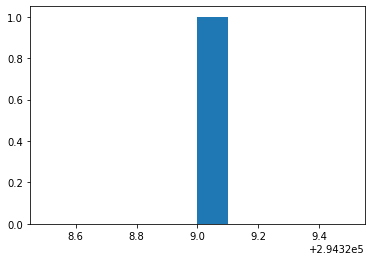

In [29]:
from nltk.tokenize import regexp_tokenize
import matplotlib.pyplot as plt
# Split the script into lines: 
lines = data.split('\n')
# Replace all script lines for speaker 
pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"
lines = [re.sub(pattern, '', l) for l in lines]#
# Tokenize each line: tokenized_lines
tokenized_lines = [regexp_tokenize(s,pattern='\w+') for s in lines]

# Make a frequency list of lengths: line_num_words
line_num_words = [len(t_line) for t_line in tokenized_lines]
line_num_words
# Plot a histogram of the line lengths
plt.hist(line_num_words)

# Show the plot
plt.show()

In [30]:
token = word_tokenize(data)#all the token
lower_token = [t.lower() for t in token]
lower_token

['keeps',
 'skipping/fast-forwarding',
 '-.-',
 'ps4',
 'app',
 '-',
 'ireland.no',
 '4k',
 'content',
 'in',
 'the',
 'uk.when',
 'i',
 'click',
 'on',
 'a',
 'show',
 ',',
 'i',
 'can',
 '’',
 't',
 'go',
 'down',
 'to',
 'scroll',
 'through',
 'the',
 'episodes',
 '.',
 'anyone',
 'else',
 'having',
 'that',
 'issue',
 '?',
 'the',
 'disney',
 'plus',
 'app',
 'allows',
 'you',
 'to',
 'change',
 'your',
 'email',
 '/',
 'password',
 'on',
 'the',
 'app',
 'itself',
 'without',
 'email',
 'authentication',
 '.',
 'what',
 'the',
 'hell',
 'is',
 'this',
 '?',
 'are',
 'we',
 'in',
 '2005',
 '?',
 'this',
 'is',
 'surely',
 'a',
 'massive',
 'security',
 'issue',
 'if',
 'someone',
 'got',
 'my',
 'password.items',
 'disappearing',
 'off',
 'watch',
 'list',
 '?',
 'disney+',
 'finally',
 'came',
 'out',
 'of',
 'the',
 'uk',
 'and',
 'i',
 'added',
 'quite',
 'a',
 'lot',
 'of',
 'stuff',
 'into',
 'my',
 'watch',
 'list',
 'but',
 'half',
 'of',
 'it',
 'isn',
 '’',
 't',
 'appeari

In [32]:
#count the token
from collections import Counter
bow_simple = Counter(lower_token)
bow_simple

Counter({'keeps': 21,
         'skipping/fast-forwarding': 1,
         '-.-': 1,
         'ps4': 101,
         'app': 533,
         '-': 276,
         'ireland.no': 2,
         '4k': 421,
         'content': 647,
         'in': 3765,
         'the': 12455,
         'uk.when': 1,
         'i': 6223,
         'click': 44,
         'on': 3674,
         'a': 5389,
         'show': 693,
         ',': 8499,
         'can': 983,
         '’': 3781,
         't': 1189,
         'go': 302,
         'down': 144,
         'to': 6830,
         'scroll': 11,
         'through': 224,
         'episodes': 329,
         '.': 9113,
         'anyone': 134,
         'else': 148,
         'having': 194,
         'that': 3760,
         'issue': 233,
         '?': 2287,
         'disney': 1858,
         'plus': 404,
         'allows': 19,
         'you': 2615,
         'change': 133,
         'your': 634,
         'email': 109,
         '/': 54,
         'password': 65,
         'itself': 35,
         'with

In [58]:
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import nltk
nltk.download('wordnet')
my_stop_words=ENGLISH_STOP_WORDS.union(['just','t','s','watch','really','make'])
alpha_only = [t for t in lower_token if t.isalpha()]#only word
no_stops  =  [t for t in alpha_only if t not in my_stop_words]#delete stopwords
k = WordNetLemmatizer()
lemmatized = [k.lemmatize(t) for t in no_stops]#lemmatize the word
bow = Counter(lemmatized)
print(bow.most_common(10))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\p0912\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[('disney', 1862), ('like', 1234), ('movie', 1092), ('tv', 740), ('content', 651), ('think', 648), ('show', 616), ('episode', 585), ('service', 571), ('time', 567)]


In [59]:
from gensim.corpora.dictionary import Dictionary#lable the word and their frequences of occuring
dic = Dictionary([lemmatized])
corpus = [dic.doc2bow(article) for article in [lemmatized]]
print(corpus[0][:10])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 2), (6, 1), (7, 1), (8, 1), (9, 2)]


In [60]:
import pandas as pd
X=pd.DataFrame(bow_doc)
X

,0,1
0,2816,1862
1,5920,1234
2,6720,1092
3,10951,740
4,2074,651
5,10537,648
6,9374,616
7,3355,585
8,9254,571
9,10652,567


In [72]:
doc = corpus[0]
# Sort the doc for frequency: bow_doc
bow_doc = sorted(doc, key=lambda w: w[1], reverse=True)
for word_id, word_count in bow_doc[:40]:
    print(dic.get(word_id), word_count)

disney 1862
like 1234
movie 1092
tv 740
content 651
think 648
show 616
episode 585
service 571
time 567
know 563
people 546
app 533
want 495
available 485
new 483
season 483
release 456
did 455
netflix 448
doe 440
thing 432
plus 405
war 398
right 394
streaming 392
going 387
m 386
year 380
don 375
hulu 367
way 367
uk 365
http 364
film 360
work 356
month 355
good 352
series 347
issue 341


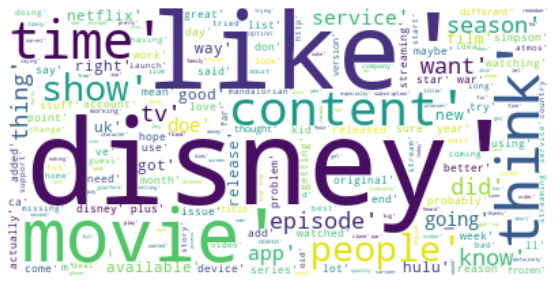

In [64]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# Create and generate a word cloud image
my_cloud = WordCloud(background_color='white').generate(str(lemmatized))
fig = plt.figure(figsize=(13,5))
# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")

# Don't forget to show the final image
plt.show()